###**BIKE Rental**

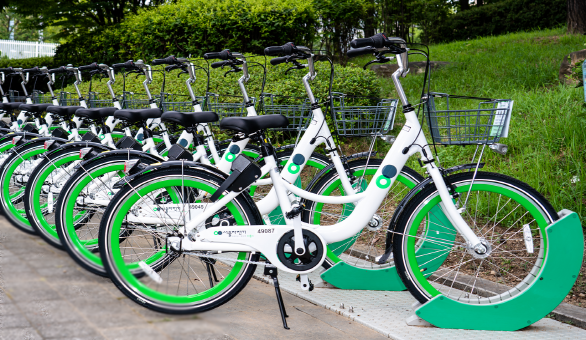

In [226]:
from IPython.display import Image
Image(filename='Bike.png')

### **Project Overview**

Bike share systems provide an automated way for people to rent bikes using a network of kiosks located throughout a city. These systems allow users to sign up for membership, rent a bike from one location, and return it at another, offering flexibility based on their travel needs. Today, there are over 500 bike share programs operating globally.

**Importing Libraries**

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import suptitle, subplots_adjust, show
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

### **Exploratory Data Analysis (EDA)**

**Initial Data Understanding**



*   Data Loading and Inspection
*   Data Types

*   Missing Values
*   Duplicates





In [228]:
bike_df = pd.read_csv('Bike.csv')
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [229]:
bike_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [230]:
bike_df.shape

(10886, 12)

In [231]:
bike_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [232]:
bike_df.rename(columns={
    'casual': 'non-subscribed_users',
    'registered': 'subscribed_users',
    'count': 'count_of_users',
    'temp' : 'temperature',
    'atemp' : 'feels_like_temp'
}, inplace=True)


In [233]:
bike_df.head()

,datetime,season,holiday,workingday,weather,temperature,feels_like_temp,humidity,windspeed,non-subscribed_users,subscribed_users,count_of_users
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [234]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              10886 non-null  object 
 1   season                10886 non-null  int64  
 2   holiday               10886 non-null  int64  
 3   workingday            10886 non-null  int64  
 4   weather               10886 non-null  int64  
 5   temperature           10886 non-null  float64
 6   feels_like_temp       10886 non-null  float64
 7   humidity              10886 non-null  int64  
 8   windspeed             10886 non-null  float64
 9   non-subscribed_users  10886 non-null  int64  
 10  subscribed_users      10886 non-null  int64  
 11  count_of_users        10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [235]:
bike_df.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temperature,0
feels_like_temp,0
humidity,0
windspeed,0
non-subscribed_users,0


**Basic Statistical Overview**

In [236]:
bike_df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temperature,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
feels_like_temp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
non-subscribed_users,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
subscribed_users,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


In [237]:
bike_df.select_dtypes(include='object').describe()

,datetime
count,10886
unique,10886
top,2012-12-19 23:00:00
freq,1


In [238]:
# Drop irrelevant or non-numeric columns
df_filtered = bike_df.drop(['datetime', 'season', 'holiday', 'workingday', 'weather'], axis=1)

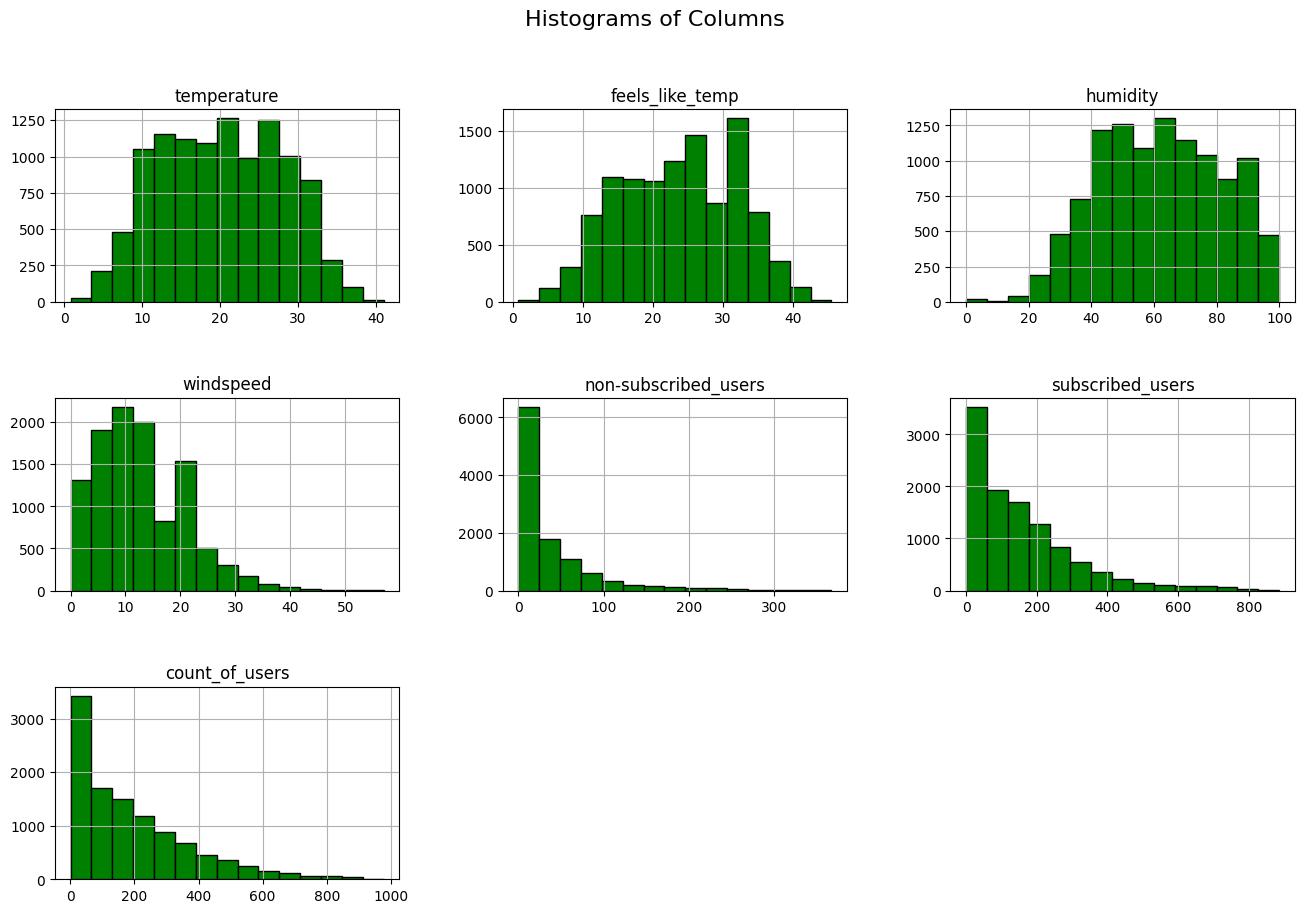

In [239]:
# Plot histograms
df_filtered.hist(
    bins=15,
    figsize=(16, 10),
    color='green',
    edgecolor='black'
)

# Add a main title and adjust spacing
plt.suptitle('Histograms of Columns', fontsize=16)
plt.subplots_adjust(hspace=0.5)
plt.show()


In [240]:
data = bike_df

In [241]:
data['season'] = data['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

In [242]:
data['season'].value_counts()

,count
season,
Winter,2734
Summer,2733
Fall,2733
Spring,2686


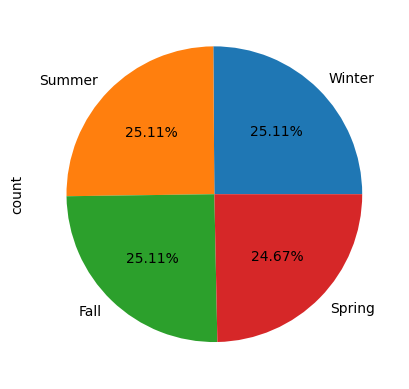

In [243]:
data['season'].value_counts().plot.pie(autopct='%0.2f%%')
plt.show()

In [244]:
data['holiday']= data['holiday'].replace({0: 'No Holiday', 1: 'Holiday'})

In [245]:
data['holiday'].value_counts()

,count
holiday,
No Holiday,10575
Holiday,311


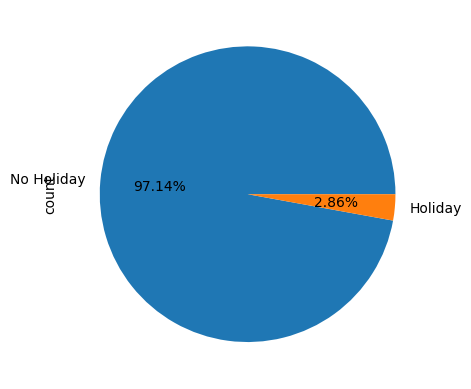

In [246]:
data['holiday'].value_counts().plot.pie(autopct='%0.2f%%')
plt.show()

In [247]:
data['workingday'] = data['workingday'].replace({0: 'No Working Day', 1: 'Working Day'})

In [248]:
data['workingday'].value_counts()

,count
workingday,
Working Day,7412
No Working Day,3474


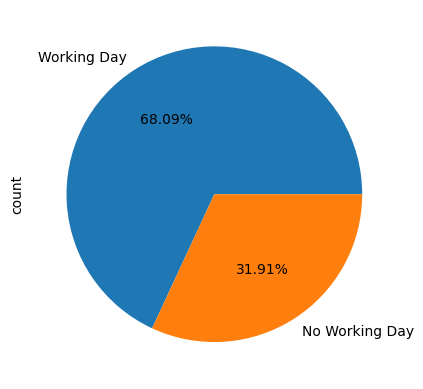

In [249]:
data['workingday'].value_counts().plot.pie(autopct='%0.2f%%')
plt.show()

In [250]:
data['weather'] = data['weather'].replace({1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4: 'Heavy Rain'})

In [251]:
data['weather'].value_counts()

,count
weather,
Clear,7192
Mist,2834
Light Snow,859
Heavy Rain,1


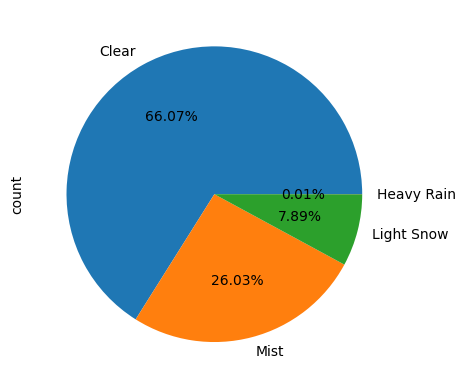

In [252]:
data['weather'].value_counts().plot.pie(autopct='%0.2f%%')
plt.show()

### **Distribution of Variables**



*   Numerical Features (KDE)



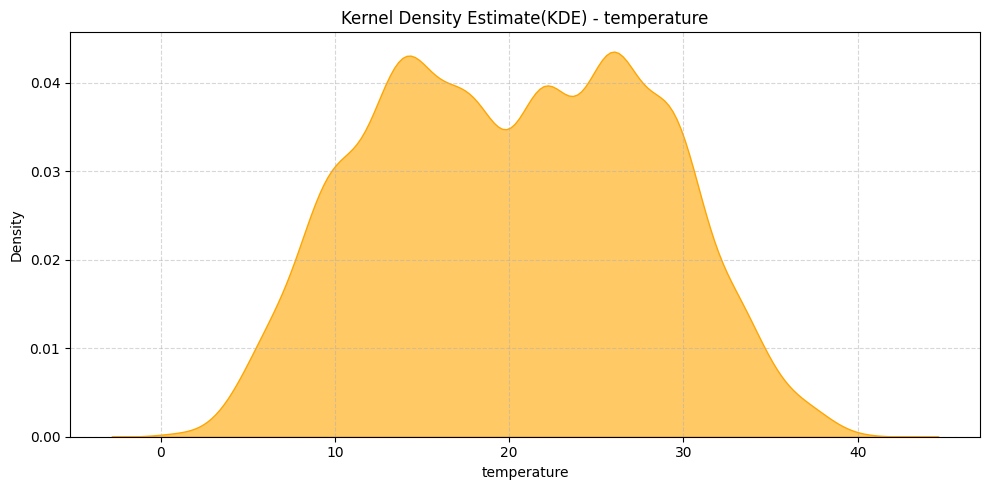

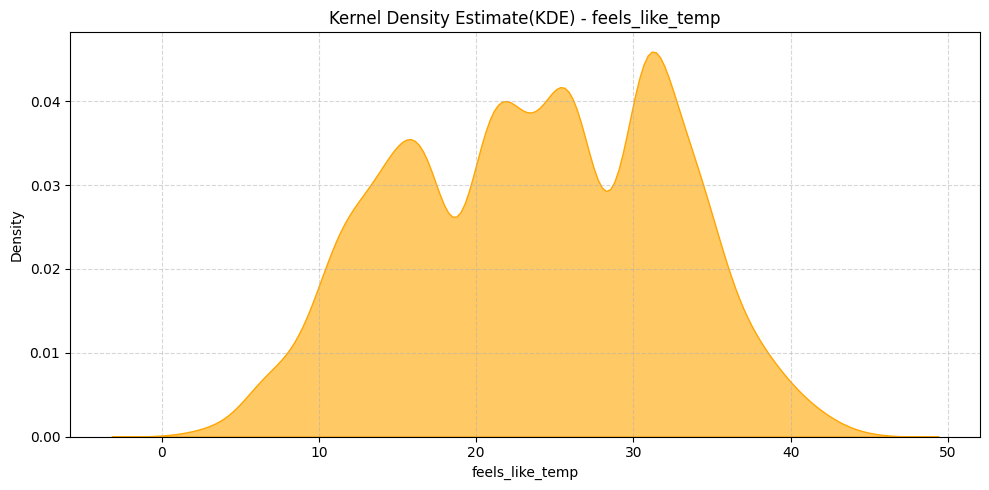

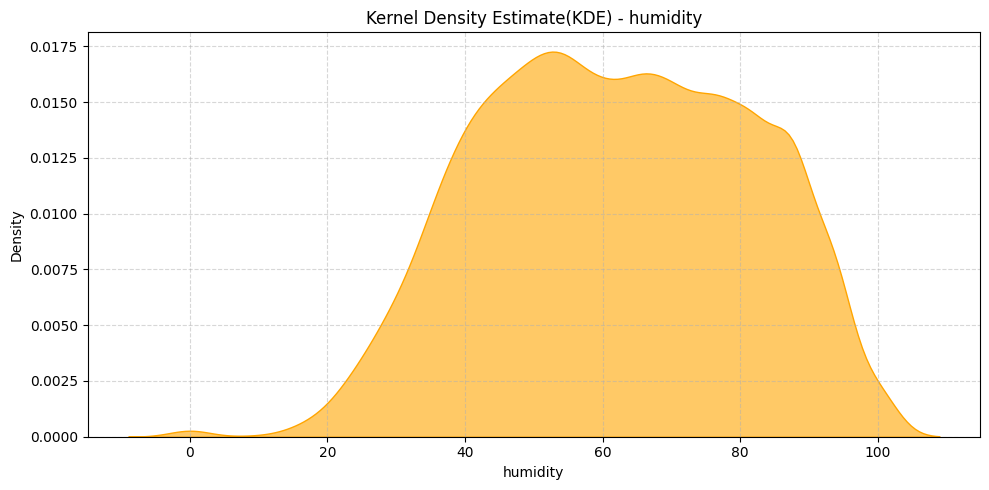

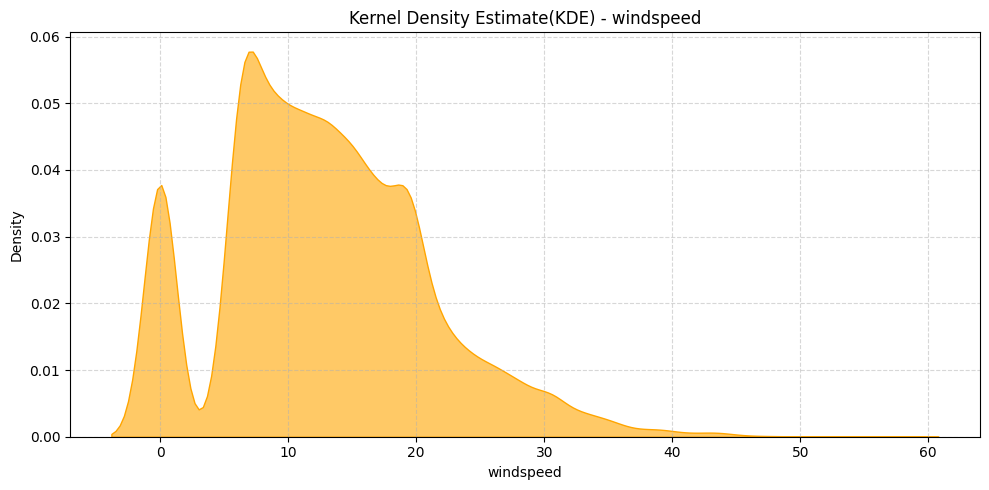

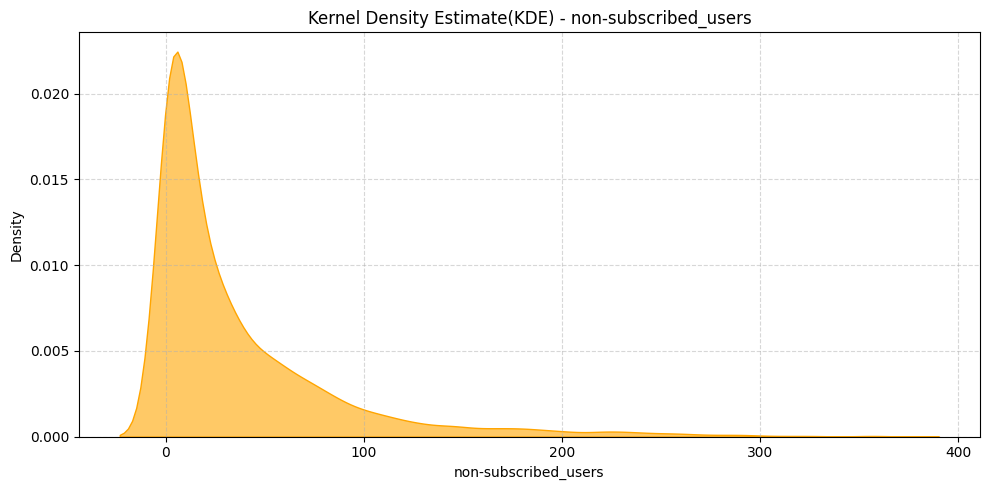

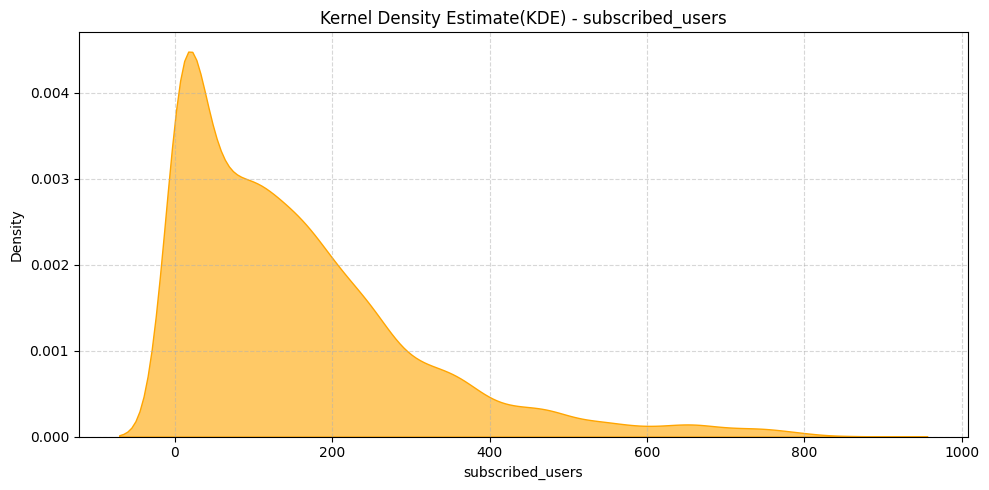

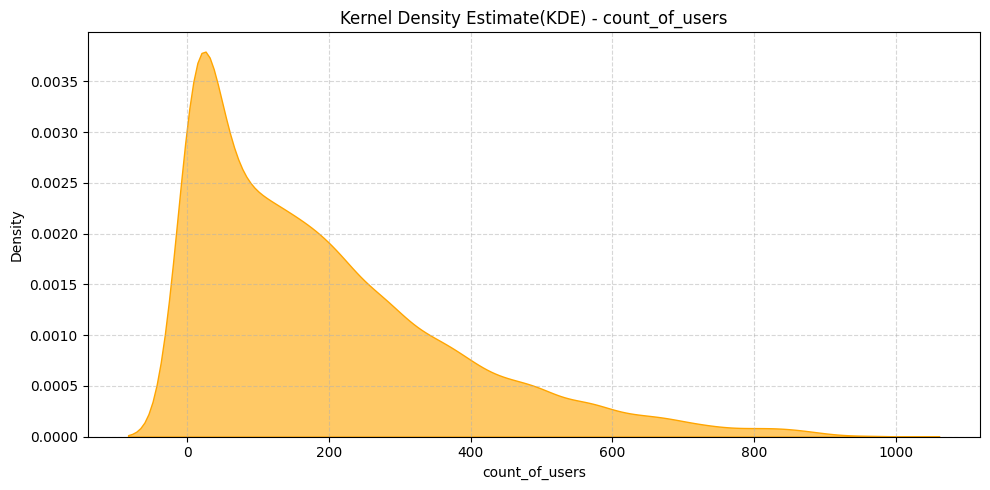

In [253]:
from matplotlib.pyplot import figure, title, xlabel, ylabel, grid, tight_layout
from seaborn import set, kdeplot

for col in df_filtered.select_dtypes('number').columns:
  figure(figsize=(10, 5))
  kdeplot(data[col], color='ORANGE', fill=True, alpha=0.6)
  title(f'Kernel Density Estimate(KDE) - {col}')
  xlabel(col)
  ylabel('Density')
  grid(True, alpha=0.5, linestyle='--')
  tight_layout()
  show()

Correlation

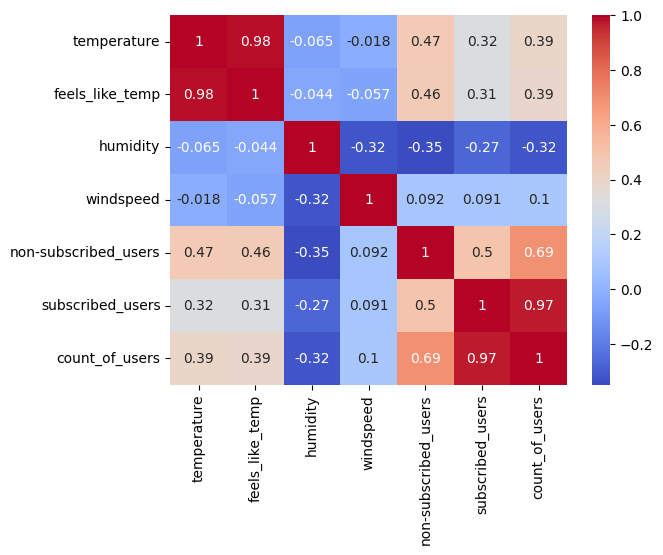

In [254]:
sns.heatmap(df_filtered.select_dtypes('number').corr(), annot=True, cmap='coolwarm')
plt.show()

 We can observe a high positive correlation of **0.97** between **subscribed_users** and **count_of_users**

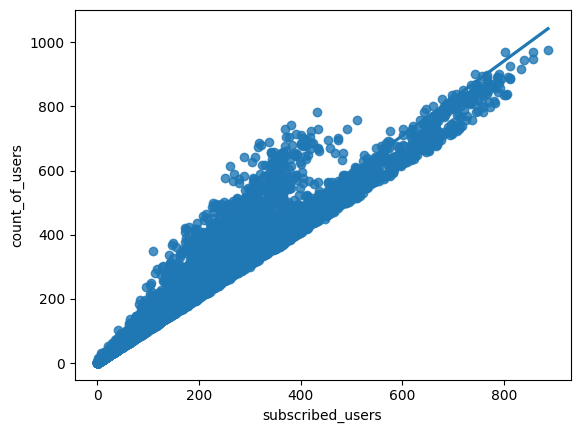

In [255]:
sns.regplot(x='subscribed_users', y='count_of_users', data=data)
plt.show()

 We can observe a high positive correlation of **0.69** between **non-subscribed_users** and **count_of_users**

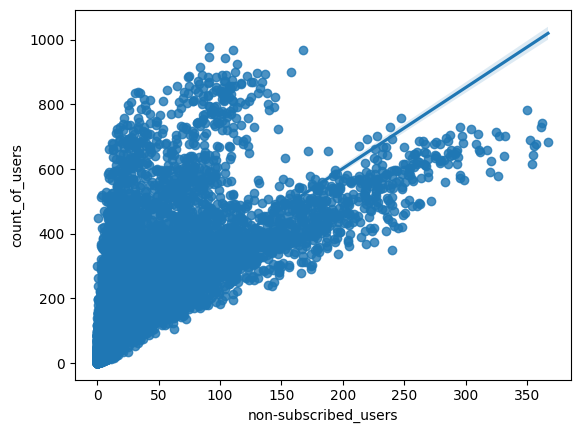

In [256]:
sns.regplot(x='non-subscribed_users', y='count_of_users', data=data)
plt.show()

 We can observe a high positive correlation of **0.98** between **Temperature** and **feels_like_temp**

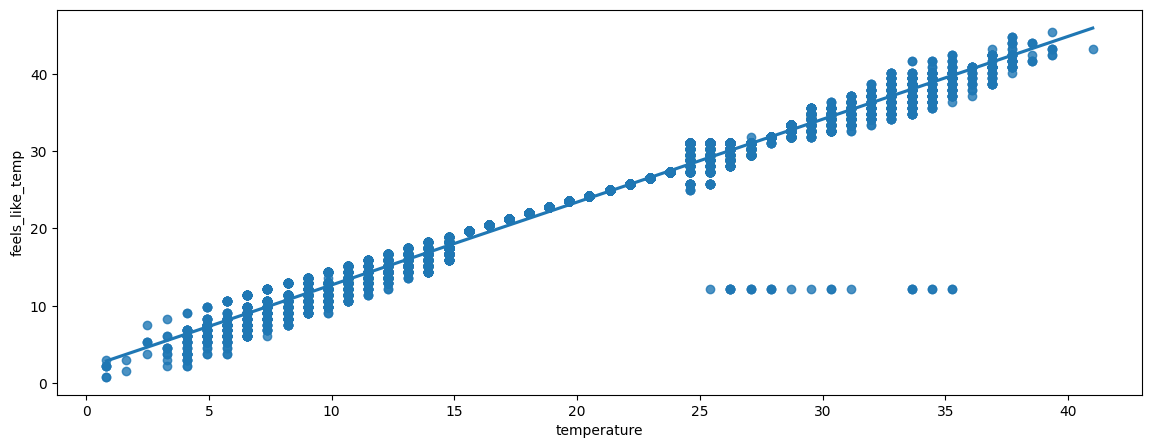

In [257]:
sns.regplot(x='temperature', y='feels_like_temp', data=data)
plt.gcf().set_size_inches(14, 5)
plt.show()

In [258]:
data['datetime'][1].split()[0]

'2011-01-01'

In [259]:
data['datetime'][0].split()[1]

'00:00:00'

In [260]:
data['date'] = data['datetime'].apply(lambda x: x.split()[0])

In [261]:
data['time'] = data['datetime'].apply(lambda x: x.split()[1])

Extracting **year** from **date**

In [262]:
data['year'] = data['date'].apply(lambda x: x.split('-')[0])

In [263]:
data['year'].value_counts()

,count
year,
2012,5464
2011,5422


<ipython-input-264-e758a15d0f5f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year', data=data, palette=['orange','purple'])


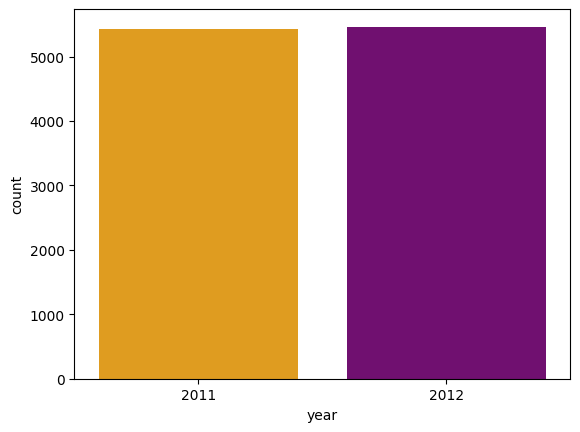

In [264]:
sns.countplot(x='year', data=data, palette=['orange','purple'])
plt.show()

Extracting **Month** from **date**

In [265]:
import calendar
import datetime

In [266]:
data['date'][0].split('-')[1]

'01'

In [267]:
data['month']= data['date'].apply(lambda x : calendar.month_name[dt.datetime.strptime(x,'%Y-%m-%d').month])

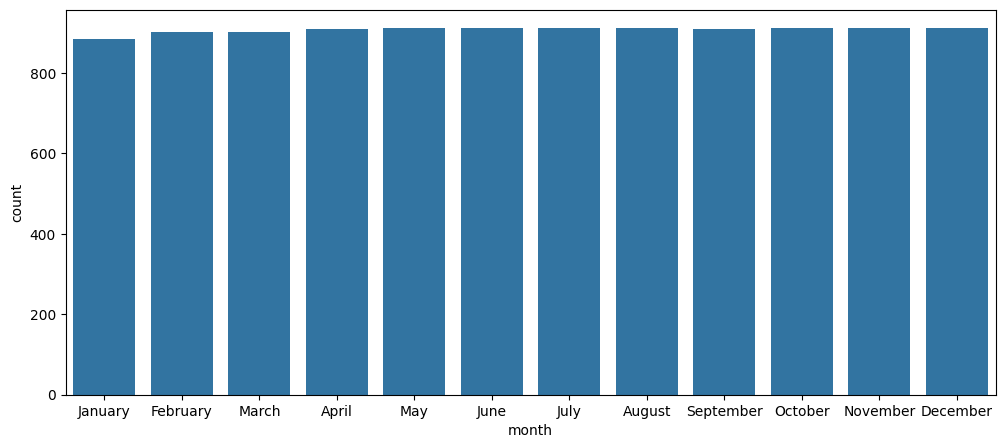

In [268]:
sns.countplot(x='month', data=data)
plt.gcf().set_size_inches(12, 5)
plt.show()

Extracting **Day** from **date**

In [269]:
data['date'][0].split('-')[2]

'01'

In [270]:
data['day']=data['date'].apply(lambda x : calendar.day_name[dt.datetime.strptime(x,'%Y-%m-%d').weekday()])

In [271]:
data['day'].value_counts()

,count
day,
Saturday,1584
Sunday,1579
Thursday,1553
Monday,1551
Wednesday,1551
Tuesday,1539
Friday,1529


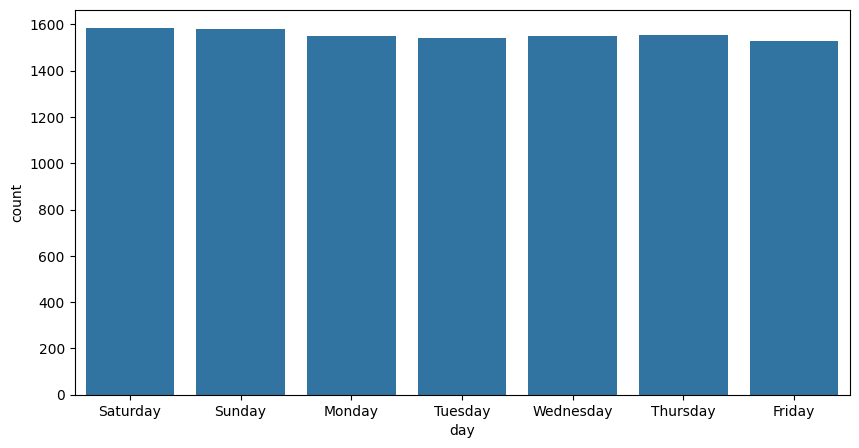

In [272]:
sns.countplot(x='day', data=data)
plt.gcf().set_size_inches(10, 5)
plt.show()

Extracting new column **weekend** from **day**

In [273]:
data['weekend'] = data['day'].apply(lambda x: 'Weekend' if x == 'Saturday' or x == 'Sunday' else 'Weekday')

In [274]:
data['weekend'].value_counts()

,count
weekend,
Weekday,7723
Weekend,3163


<ipython-input-275-91b1f75c03fa>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='weekend', data=data, palette=['yellow','grey'])


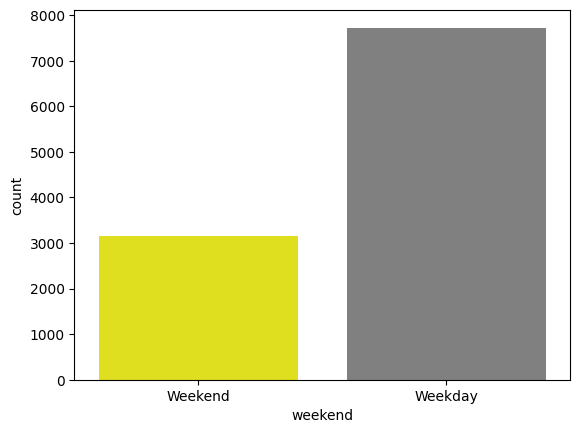

In [275]:
sns.countplot(x='weekend', data=data, palette=['yellow','grey'])
plt.show()

Extracting **Hour** from **time**

In [276]:
data['time'][50].split(':')[0]

'05'

In [277]:
data['hour'] = data['time'].apply(lambda x: x.split(':')[0])

In [278]:
data['hour'].value_counts()

,count
hour,
16,456
17,456
18,456
19,456
12,456
13,456
14,456
15,456
20,456


In [279]:
hourly_avg = data.groupby('hour')['count_of_users'].mean()

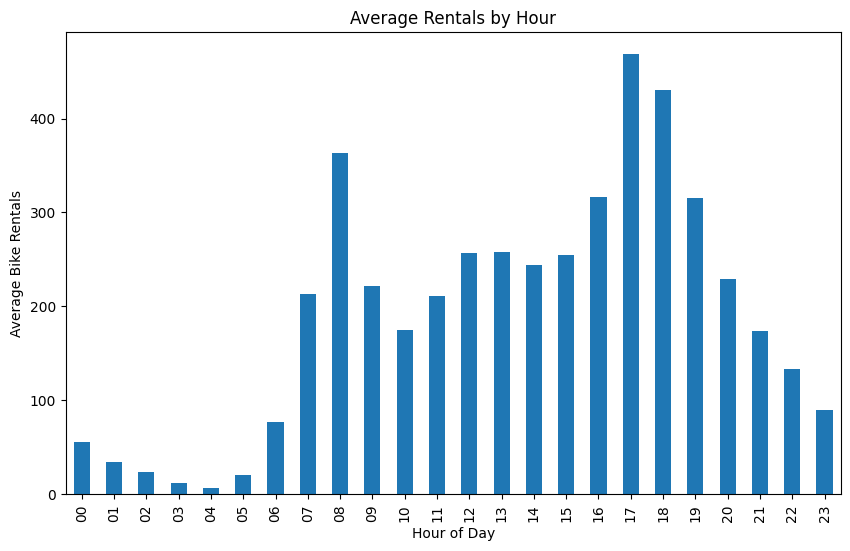

In [280]:
hourly_avg.plot(kind='bar', figsize=(10, 6), title='Average Rentals by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Bike Rentals')
plt.show()

In [281]:
bike_df['datetime'] = pd.to_datetime(bike_df['datetime'])
bike_df['hour'] = bike_df['datetime'].dt.hour
bike_df['day'] = bike_df['datetime'].dt.day
bike_df['month'] = bike_df['datetime'].dt.month
bike_df['weekday'] = bike_df['datetime'].dt.weekday

In [282]:
bike_df.head()

,datetime,season,holiday,workingday,weather,temperature,feels_like_temp,humidity,windspeed,non-subscribed_users,subscribed_users,count_of_users,date,time,year,month,day,weekend,hour,weekday
0,2011-01-01 00:00:00,Spring,No Holiday,No Working Day,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,00:00:00,2011,1,1,Weekend,0,5
1,2011-01-01 01:00:00,Spring,No Holiday,No Working Day,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,01:00:00,2011,1,1,Weekend,1,5
2,2011-01-01 02:00:00,Spring,No Holiday,No Working Day,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,02:00:00,2011,1,1,Weekend,2,5
3,2011-01-01 03:00:00,Spring,No Holiday,No Working Day,Clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,03:00:00,2011,1,1,Weekend,3,5
4,2011-01-01 04:00:00,Spring,No Holiday,No Working Day,Clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,04:00:00,2011,1,1,Weekend,4,5


In [283]:
features = ['temperature', 'humidity', 'windspeed', 'hour', 'month', 'day']
target = 'count_of_users'

In [284]:
X = bike_df[features]
y = bike_df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Linear Regression**

In [285]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

print("Linear Regression R²:", r2_score(y_test, y_pred_lr))
print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_lr))

Linear Regression R²: 0.3437197843742419
Linear Regression MAE: 107.60194298998921


In [286]:
print(model_lr.score(X_train,y_train))
print(model_lr.score(X_test,y_test))

0.33436675897125157
0.3437197843742419


## **Decision Trees**

In [287]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree R²:", r2_score(y_test, y_pred_dt))
print("Decision Tree MAE:", mean_absolute_error(y_test, y_pred_dt))

Decision Tree R²: 0.4659077158051106
Decision Tree MAE: 80.25482093663912


In [288]:
print(dt.score(X_train,y_train))
print(dt.score(X_test,y_test))

1.0
0.4659077158051106


## **Random Forest**

In [ ]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest R²:", r2_score(y_test, y_pred_rf))
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))


Random Forest R²: 0.7215342290228517
Random Forest MAE: 63.43258034894397


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:50], label='Actual')
plt.plot(y_pred_rf[:50], label='Random Forest Predictions', linestyle='--')
plt.legend()
plt.title('Actual vs Predicted Bike Rentals (Random Forest)')
plt.show()
